In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import matplotlib.pyplot as plt
import numpy
import os

In [34]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [35]:
import cv2
import scipy
from tqdm import tqdm
import numpy as np
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    for wbc_type in os.listdir(folder):
        if not wbc_type.startswith('.'):
            if wbc_type in ['NEUTROPHIL']:
                label = 1
                label2 = 1
            elif wbc_type in ['EOSINOPHIL']:
                label = 2
                label2 = 1
            elif wbc_type in ['MONOCYTE']:
                label = 3  
                label2 = 0
            elif wbc_type in ['LYMPHOCYTE']:
                label = 4 
                label2 = 0
            else:
                label = 5
                label2 = 0
            for image_filename in tqdm(os.listdir(folder + wbc_type)):
                img_file = cv2.imread(folder + wbc_type + '/' + image_filename)
                if img_file is not None:
                    img_file = scipy.misc.imresize(arr=img_file, size=(60, 80, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y
X_test, y_test= get_data('/datasets/ee285s-public/BCCD/dataset2-master/images/TEST/')

# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
from keras.utils.np_utils import to_categorical
y_testHot = to_categorical(y_test, num_classes = 5)
dict_characters = {1:'NEUTROPHIL',2:'EOSINOPHIL',3:'MONOCYTE',4:'LYMPHOCYTE'}
print(dict_characters)


  0%|          | 0/624 [00:00<?, ?it/s]/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
100%|██████████| 623/623 [00:02<00:00, 263.22it/s]


{1: 'NEUTROPHIL', 2: 'EOSINOPHIL', 3: 'MONOCYTE', 4: 'LYMPHOCYTE'}


In [36]:
X_test=np.array(X_test)
X_test=X_test/255.0

In [37]:
import keras
loaded_model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

In [38]:
score = loaded_model.evaluate(X_test, y_testHot, verbose=0)

In [39]:
#Display the accuracy for the whole testing set
print "Accuracy for our model on the test set: " + str(score[1])
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Accuracy for our model on the test set: 0.8910333733746552
acc: 89.10%


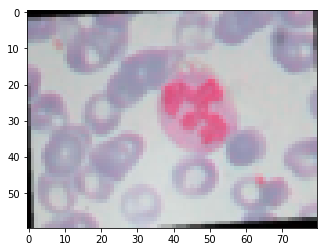

The cell type of sample 500 is predicted as : NEUTROPHIL, and the truth is : NEUTROPHIL
Correct!


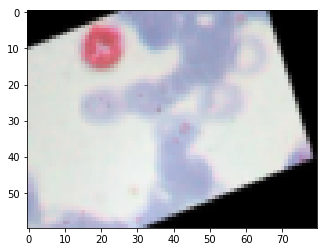

The cell type of sample 501 is predicted as : EOSINOPHIL, and the truth is : NEUTROPHIL
Wrong!


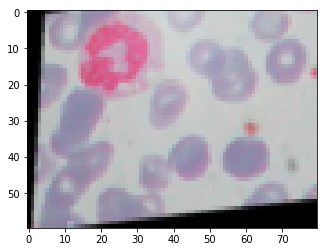

The cell type of sample 502 is predicted as : NEUTROPHIL, and the truth is : NEUTROPHIL
Correct!


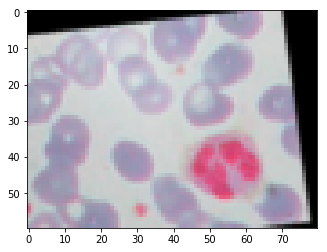

The cell type of sample 503 is predicted as : EOSINOPHIL, and the truth is : NEUTROPHIL
Wrong!


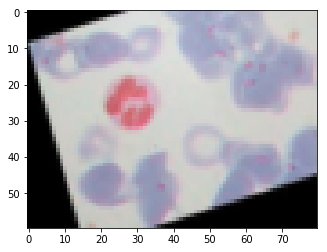

The cell type of sample 504 is predicted as : NEUTROPHIL, and the truth is : NEUTROPHIL
Correct!


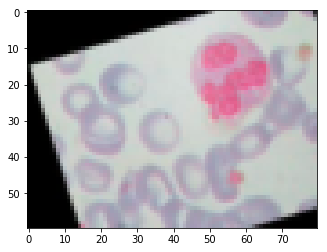

The cell type of sample 505 is predicted as : NEUTROPHIL, and the truth is : NEUTROPHIL
Correct!


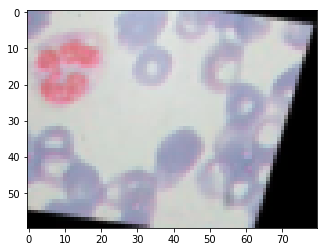

The cell type of sample 506 is predicted as : NEUTROPHIL, and the truth is : NEUTROPHIL
Correct!


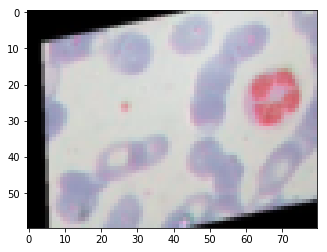

The cell type of sample 507 is predicted as : EOSINOPHIL, and the truth is : NEUTROPHIL
Wrong!


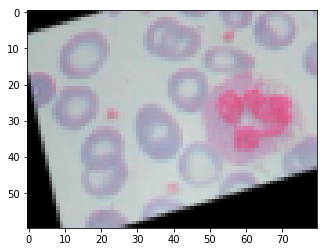

The cell type of sample 508 is predicted as : NEUTROPHIL, and the truth is : NEUTROPHIL
Correct!


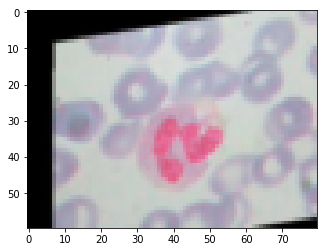

The cell type of sample 509 is predicted as : NEUTROPHIL, and the truth is : NEUTROPHIL
Correct!
Total accuracy : 0.7


In [42]:
#Display the prediction for sample from demo_start_index to demo_end_index
correct = 0;
demo_start_index = 500;
demo_end_index = 510;
for i in range(demo_start_index, demo_end_index):
    plt.figure()
    plt.imshow(X_test[i,:])
    plt.show()
    predict_label = np.argmax(loaded_model.predict(X_test[i,:].reshape(1,60,80,3)))
    truth_label = np.argmax((y_testHot[i,:]))
    print("The cell type of sample " + str(i) + " is predicted as : " + dict_characters[predict_label] + ", and the truth is : " + dict_characters[truth_label])
    
    
    if(predict_label == truth_label):
        print("Correct!")
        correct += 1
    else:
        print("Wrong!")
print("Total accuracy : " + str(correct*1.0/(demo_end_index-demo_start_index)))
        
    
    